## Banking Project (`Credit Risk Scoring by Machine Learning`)

In [2]:
!pip install -U scikit-learn

In [4]:
import sklearn

print(sklearn.__version__)

1.1.2


### Import the required Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
df.shape

(32581, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
cat_columns = df.select_dtypes(include=['object'])
num_columns = df.select_dtypes(exclude =['object'])

In [10]:
cat_columns.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [11]:
num_columns.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

## EDA

### Checking for duplicated records

In [12]:
dup_records = df.duplicated(keep='first')
df[dup_records]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


### dropping duplicate records

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(32416, 12)

In [15]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [16]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [17]:
num_columns.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

<AxesSubplot:xlabel='person_age', ylabel='Count'>

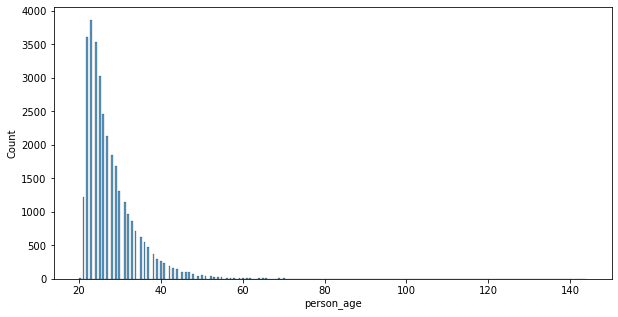

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df['person_age'])

<AxesSubplot:xlabel='person_age'>

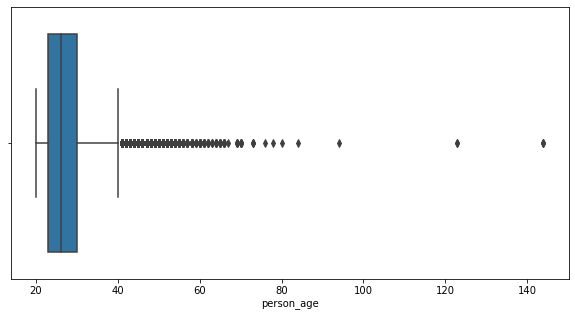

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(df['person_age'])

<AxesSubplot:xlabel='person_emp_length', ylabel='Count'>

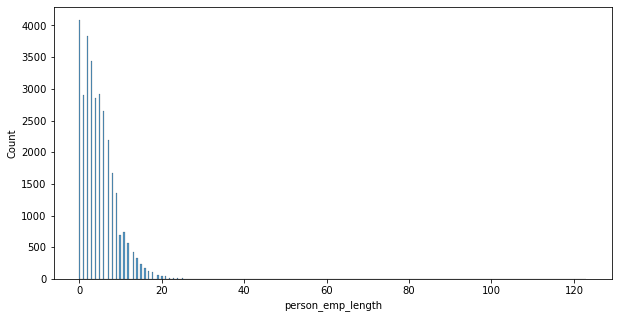

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['person_emp_length'])

<AxesSubplot:xlabel='person_emp_length'>

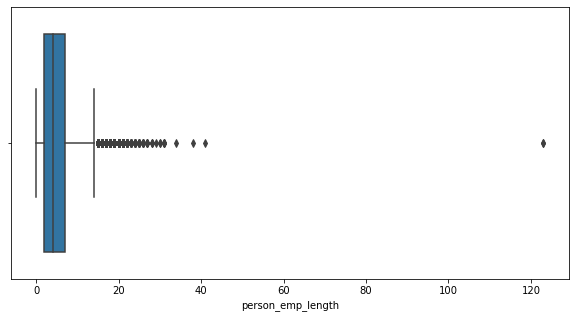

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(df['person_emp_length'])

#### 1. we can observe that there are people with above 80 years of age very less. let us suppose assume people with above age 80 years won't probably apply for loan at that age, so drop those rows having person age >=80 
#### 2. person employment also contain some absurd values which can be removed. Since, we are considering the maximun age of person who's going to apply loan within 80 so based on the domain fact that employment length cannot be greater that person age and a person will only be eligible to work after 14 years, let's consider the maximun employment length as 80-14 = 66 and drop the remaining columns

In [22]:
#there are null values in employment length column , let's also drop them

df[df['person_emp_length'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [23]:
df = df[(df['person_age'] <80) & (df['person_emp_length'] <66)]

In [24]:
df.shape

(31519, 12)

In [25]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31519.000000,3.151900e+04,31519.000000,31519.000000,28493.000000,31519.000000,31519.000000,31519.000000
mean,27.736984,6.650221e+04,4.782988,9663.951902,11.045321,0.215965,0.169659,5.814239
std,6.192713,5.275388e+04,4.037429,6335.043290,3.230829,0.411497,0.106298,4.059333
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.944400e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,78.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:xlabel='person_income', ylabel='Count'>

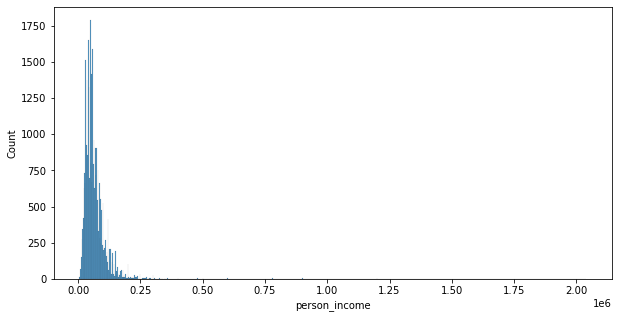

In [26]:
\plt.figure(figsize=(10,5))
sns.histplot(df['person_income'])

<AxesSubplot:xlabel='person_income'>

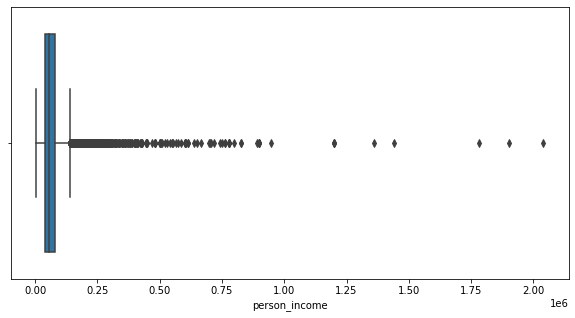

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(df['person_income'])

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

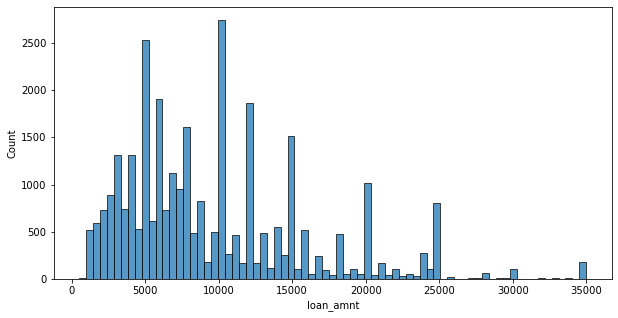

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['loan_amnt'])

<AxesSubplot:ylabel='loan_status'>

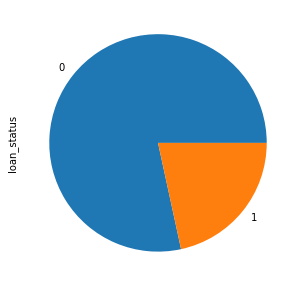

In [29]:
plt.figure(figsize=(10,5))
df['loan_status'].value_counts().plot.pie()

In [30]:
df['loan_status'].value_counts()/len(df)

0    0.784035
1    0.215965
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='loan_percent_income', ylabel='Count'>

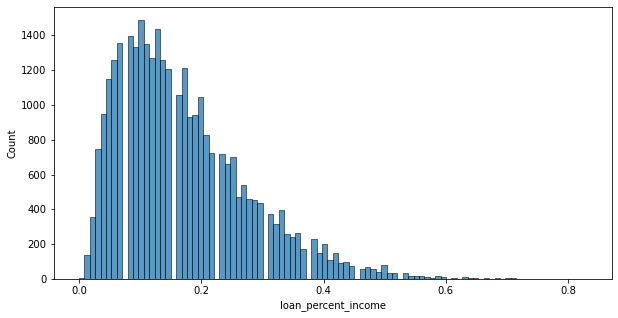

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df['loan_percent_income'])

<AxesSubplot:xlabel='cb_person_cred_hist_length', ylabel='Count'>

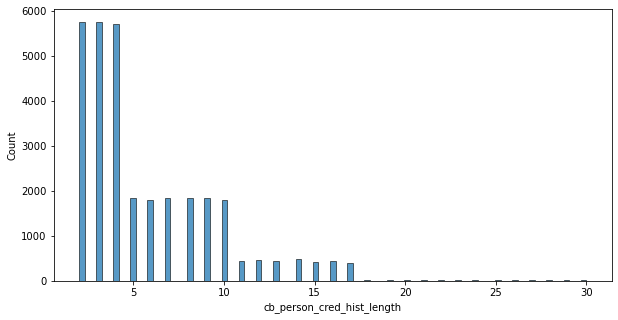

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df['cb_person_cred_hist_length'])

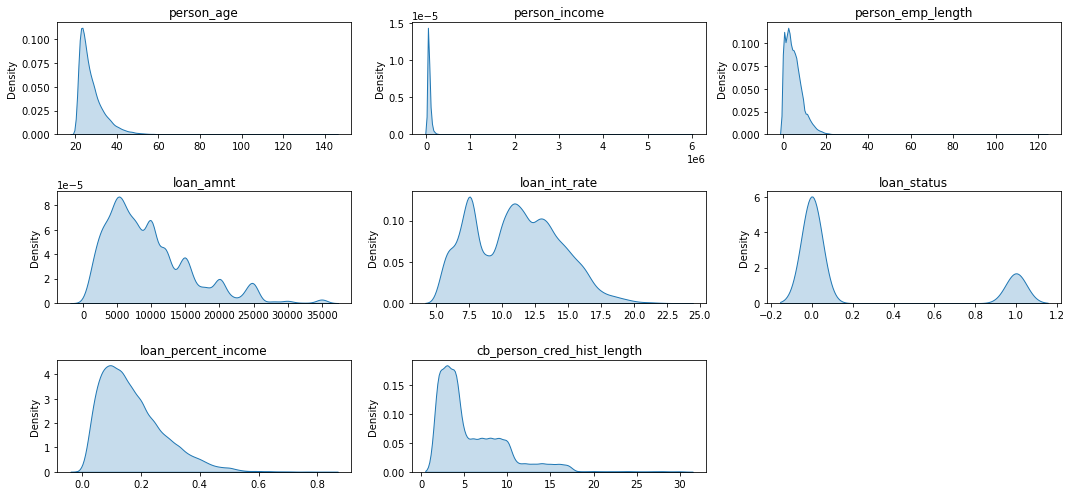

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7))
axes = axes.ravel()  
cols = num_columns.columns[:]

for col, ax in zip(cols, axes):
    sns.kdeplot(data=num_columns, x=col, shade=True, ax=ax)
    ax.set(title=col, xlabel=None)
    
fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

### Dealing with null values in interest rate column

<AxesSubplot:xlabel='loan_int_rate', ylabel='Count'>

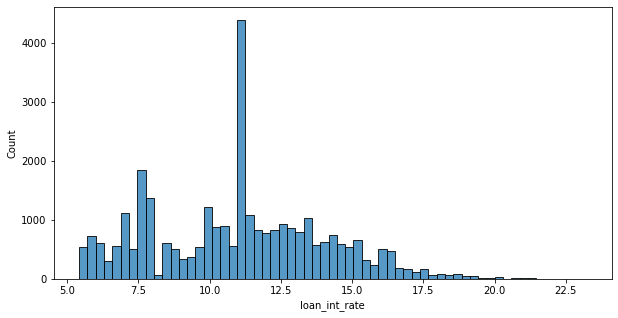

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df['loan_int_rate'])

<AxesSubplot:xlabel='loan_int_rate'>

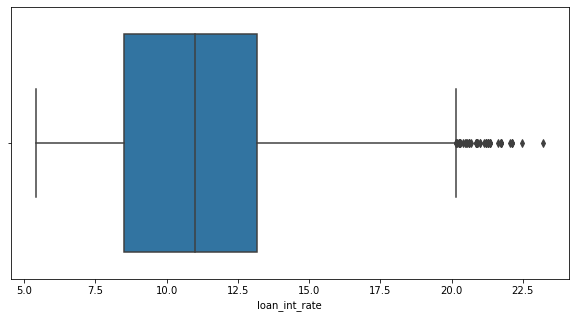

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(df['loan_int_rate'])

- Let's fill the null values with the median of interest rate

In [42]:
int_rate_median = df ['loan_int_rate'].median() 
int_rate_median

10.99

In [43]:
df ['loan_int_rate'].fillna(int_rate_median, inplace=True)

In [44]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#### So, we have dealt with all the null values and Outliers

In [45]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


# Data Preparation

- Train Test Split
- Encoding for Categorical Columns
    - Ordinal : LabelEncoding or OrdinalEncoding
    - Nominal : OneHotEncoding
- Encoding for Numerical Columns
    - Standardization (z-transformation)

##### 1. Data Identification: Choosing the Target feature and Input features

In [46]:
#Input Variables
X = df [['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 
         'loan_intent','loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
         'cb_person_default_on_file', 'cb_person_cred_hist_length']]

#output or Target variable
y = df['loan_status']

#### 2. Train & Test sets: Split the data into sets of Train and Test

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=121, stratify=df['loan_status'])

In [48]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
7598,24,54000,MORTGAGE,3.0,PERSONAL,B,8000,10.99,0.15,N,3
20581,33,110000,RENT,0.0,VENTURE,A,10000,9.32,0.09,N,6
572,26,50000,RENT,7.0,VENTURE,A,20500,7.49,0.41,N,3
12605,25,25000,RENT,3.0,DEBTCONSOLIDATION,B,3000,11.12,0.12,N,4
20985,27,45200,RENT,11.0,EDUCATION,D,5000,16.00,0.11,N,10


In [49]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(23639, 11) (23639,)
(7880, 11) (7880,)


In [50]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

#### 3. Data PrePorcessing of Train data set

- Segregate the Train data categorical and Numerical columns

In [51]:
X_train_cat  = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
7598,MORTGAGE,PERSONAL,B,N
20581,RENT,VENTURE,A,N
572,RENT,VENTURE,A,N
12605,RENT,DEBTCONSOLIDATION,B,N
20985,RENT,EDUCATION,D,N


In [52]:
X_train_num = X_train.select_dtypes(['int64', 'float64'])

X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
7598,24,54000,3.0,8000,10.99,0.15,3
20581,33,110000,0.0,10000,9.32,0.09,6
572,26,50000,7.0,20500,7.49,0.41,3
12605,25,25000,3.0,3000,11.12,0.12,4
20985,27,45200,11.0,5000,16.00,0.11,10


##### Scaling the Numerical columns

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Using Data frame to restructure the nd.array to df as the scaler converts the df to numpy nd.array
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                                                   columns = X_train_num.columns,
                                                                   index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
7598,-0.603834,-0.233675,-0.441394,-0.264378,-0.011550,-0.184698,-0.695049
20581,0.858903,0.795990,-1.185113,0.050341,-0.556464,-0.748231,0.049592
572,-0.278782,-0.307222,0.550230,1.702619,-1.153586,2.257280,-0.695049
12605,-0.441308,-0.766894,-0.441394,-1.051177,0.030868,-0.466464,-0.446835
20985,-0.116255,-0.395479,1.541855,-0.736458,1.623192,-0.560386,1.042447


##### PreProcessing of Categorical columns

In [54]:
for col in X_train_cat:
    print(col,'\n',X_train_cat[col].value_counts(normalize=True))
    print('-----------------------------------------------------------------')

person_home_ownership 
 RENT        0.507763
MORTGAGE    0.412835
OWN         0.075680
OTHER       0.003723
Name: person_home_ownership, dtype: float64
-----------------------------------------------------------------
loan_intent 
 EDUCATION            0.197555
MEDICAL              0.186345
VENTURE              0.176911
PERSONAL             0.169339
DEBTCONSOLIDATION    0.159398
HOMEIMPROVEMENT      0.110453
Name: loan_intent, dtype: float64
-----------------------------------------------------------------
loan_grade 
 A    0.325987
B    0.322602
C    0.200093
D    0.112653
E    0.029739
F    0.007318
G    0.001608
Name: loan_grade, dtype: float64
-----------------------------------------------------------------
cb_person_default_on_file 
 N    0.822074
Y    0.177926
Name: cb_person_default_on_file, dtype: float64
-----------------------------------------------------------------


In [55]:
#Nominal variables

X_train_cat_nominal = X_train_cat[['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']]


In [56]:
#One Hot Encoding for Nominal Categorical variables

from sklearn.preprocessing import OneHotEncoder

ohe_encoder = OneHotEncoder(drop='first', sparse=False)

#Using Data frame to restructure the nd.array to df as the scaler converts the df to numpy nd.array

X_train_cat_ohe = pd.DataFrame(ohe_encoder.fit_transform(X_train_cat_nominal),
                                                          columns = ohe_encoder.get_feature_names_out(X_train_cat_nominal.columns),
                                                            index = X_train_cat_nominal.index)

X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
7598,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20581,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
572,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12605,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20985,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [57]:
ohe_encoder.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [58]:
#Ordinal variables

X_train_cat_ordinal =  X_train_cat['loan_grade']

In [59]:
#Label Encoding for Ordinal variables

X_train_cat_le = pd.DataFrame(index = X_train_cat_ordinal.index)

X_train_cat_le.head()

""
7598
20581
572
12605
20985


In [60]:
X_train_cat_ordinal.unique()

array(['B', 'A', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [61]:
grade_encoder = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : grade_encoder[x])

X_train_cat_le.head()

,loan_grade
7598,2
20581,1
572,1
12605,2
20985,4


In [62]:
#concating all ohe and le coded columns

X_train_cat = pd.concat([X_train_cat_ohe, X_train_cat_le], axis=1)

X_train_cat.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
7598,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
20581,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
572,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
12605,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
20985,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [63]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
7598,-0.603834,-0.233675,-0.441394,-0.264378,-0.011550,-0.184698,-0.695049,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
20581,0.858903,0.795990,-1.185113,0.050341,-0.556464,-0.748231,0.049592,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
572,-0.278782,-0.307222,0.550230,1.702619,-1.153586,2.257280,-0.695049,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
12605,-0.441308,-0.766894,-0.441394,-1.051177,0.030868,-0.466464,-0.446835,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
20985,-0.116255,-0.395479,1.541855,-0.736458,1.623192,-0.560386,1.042447,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4


## 4. Preprocessing of test data

In [64]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29725,36,36000,MORTGAGE,0.0,VENTURE,A,12000,9.63,0.33,N,15
30191,41,30840,RENT,8.0,MEDICAL,B,6000,10.59,0.19,N,13
74,26,85000,RENT,2.0,VENTURE,A,28000,7.49,0.33,N,3
15705,26,156000,MORTGAGE,6.0,VENTURE,C,9600,14.27,0.06,Y,2
28120,31,10800,RENT,4.0,MEDICAL,C,2000,14.72,0.19,Y,6


In [65]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
29725,MORTGAGE,VENTURE,A,N
30191,RENT,MEDICAL,B,N
74,RENT,VENTURE,A,N
15705,MORTGAGE,VENTURE,C,Y
28120,RENT,MEDICAL,C,Y


In [66]:
X_test_num = X_test.select_dtypes(['int64','float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29725,36,36000,0.0,12000,9.63,0.33,15
30191,41,30840,8.0,6000,10.59,0.19,13
74,26,85000,2.0,28000,7.49,0.33,3
15705,26,156000,6.0,9600,14.27,0.06,2
28120,31,10800,4.0,2000,14.72,0.19,6


#### Scaling the Numerical columns

In [67]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                                                columns = X_test_num.columns,
                                                                  index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29725,1.346482,-0.564638,-1.185113,0.365061,-0.455313,1.505902,2.283516
30191,2.159114,-0.659515,0.798136,-0.579098,-0.142069,0.190991,1.787088
74,-0.278782,0.336319,-0.689301,2.882817,-1.153586,1.505902,-0.695049
15705,-0.278782,1.641787,0.302324,-0.012603,1.058700,-1.029997,-0.943263
28120,0.533850,-1.027988,-0.193488,-1.208537,1.205533,0.190991,0.049592


#### PreProcessing of Categorical columns

In [68]:
#Nominal variables

X_test_cat_nominal = X_test_cat[['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']]


In [69]:
#One Hot Encoding for Nominal Categorical variables

X_test_cat_ohe = pd.DataFrame(ohe_encoder.transform(X_test_cat_nominal),
                                                     columns=ohe_encoder.get_feature_names_out(X_test_cat_nominal.columns),
                                                     index = X_test_cat_nominal.index)

X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
29725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30191,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
28120,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [70]:
ohe_encoder.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [71]:
#Ordinal  variables

X_test_cat_ordinal =  X_test_cat['loan_grade']


In [72]:
#Label Encoding for Ordinal variables

X_test_cat_le = pd.DataFrame(index = X_test_cat_ordinal.index)

X_test_cat_le.head()

""
29725
30191
74
15705
28120


In [73]:
X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : grade_encoder[x])

X_test_cat_le.head()

,loan_grade
29725,1
30191,2
74,1
15705,3
28120,3


In [74]:
#concating all ohe and le coded columns

X_test_cat = pd.concat([X_test_cat_ohe,X_test_cat_le], axis=1)

X_test_cat.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
29725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
30191,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
15705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3
28120,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [75]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
29725,1.346482,-0.564638,-1.185113,0.365061,-0.455313,1.505902,2.283516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
30191,2.159114,-0.659515,0.798136,-0.579098,-0.142069,0.190991,1.787088,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
74,-0.278782,0.336319,-0.689301,2.882817,-1.153586,1.505902,-0.695049,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
15705,-0.278782,1.641787,0.302324,-0.012603,1.058700,-1.029997,-0.943263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3
28120,0.533850,-1.027988,-0.193488,-1.208537,1.205533,0.190991,0.049592,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3


## 5 & 6. Building the model on the transformed trained data set & testing the model on test data set

## KNN Classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier()

KNN_classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [77]:
y_test_pred_KNN = KNN_classifier.predict(X_test_transformed)

In [78]:
KNN_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_KNN})

KNN_df.head()

,Actual,Predicted
29725,0,0
30191,0,0
74,1,1
15705,0,0
28120,1,0


In [82]:
from sklearn import metrics

KNN_accuracy = metrics.accuracy_score(y_test, y_test_pred_KNN)

print(f"Accuracy attained by KNN Classifier: {round(KNN_accuracy,4)*100}%")

Accuracy attained by KNN Classifier: 88.9%


## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

Log_regressor = LogisticRegression()

Log_regressor.fit(X_train_transformed, y_train)

LogisticRegression()

In [84]:
y_test_pred_Log_reg = Log_regressor.predict(X_test_transformed)

In [87]:
Log_reg_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred_Log_reg})

Log_reg_df.head()

,Actual,Predicted
29725,0,0
30191,0,0
74,1,0
15705,0,0
28120,1,1


In [89]:
Log_reg_accuracy = metrics.accuracy_score(y_test, y_test_pred_Log_reg)

print(f"Accuracy attained by Logistic Regression : {round(Log_reg_accuracy,5)*100}%")

Accuracy attained by Logistic Regression : 85.152%


## Support Vector Classfier

In [90]:
from sklearn.svm import SVC

SVM_classifier = SVC()

SVM_classifier.fit(X_train_transformed, y_train)

SVC()

In [91]:
y_test_pred_SVC = SVM_classifier.predict(X_test_transformed)

In [92]:
SVM_df = pd.DataFrame({'Actaul':y_test, 'Predicted':y_test_pred_SVC})

SVM_df.head()

,Actaul,Predicted
29725,0,0
30191,0,0
74,1,1
15705,0,0
28120,1,0


In [93]:
SVC_accuracy = metrics.accuracy_score(y_test, y_test_pred_SVC)

print(f"Accuracy attained by Support Vector Machine Classifier: {round(SVC_accuracy,4)*100}%")

Accuracy attained by Support Vector Machine Classifier: 90.8%


## Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier

Dec_tree_classifier = DecisionTreeClassifier()

Dec_tree_classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [95]:
y_test_pred_dec_tree = Dec_tree_classifier.predict(X_test_transformed)

In [96]:
Dec_tree_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred_dec_tree})

Dec_tree_df.head()

,Actual,Predicted
29725,0,0
30191,0,0
74,1,1
15705,0,0
28120,1,1


In [97]:
Dec_tree_accuracy = metrics.accuracy_score(y_test, y_test_pred_dec_tree)

print(f"Accuracy attained by Decision Tree Classifier: {round(SVC_accuracy,4)*100}%")

Accuracy attained by Decision Tree Classifier: 90.8%


## Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

Ran_forest_classifier = RandomForestClassifier()

Ran_forest_classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [99]:
y_test_pred_ran_forest = Ran_forest_classifier.predict(X_test_transformed)

In [100]:
Ran_forest_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred_ran_forest})

Ran_forest_df.head()

,Actual,Predicted
29725,0,0
30191,0,0
74,1,1
15705,0,0
28120,1,1


In [101]:
Ran_forest_accuracy = metrics.accuracy_score(y_test, y_test_pred_ran_forest)

print(f"Accuracy attained by Random Forest Classifier: {round(Ran_forest_accuracy,4)*100}%")

Accuracy attained by Random Forest Classifier: 93.39%


## Analysis on the `algorithms` and  `accuracy` attained by each algorithm

In [102]:
algo_accuracy = pd.DataFrame([KNN_accuracy, Log_reg_accuracy, SVC_accuracy, Dec_tree_accuracy, Ran_forest_accuracy],
                                                     index = ['KNN Classifier', 'Logistic Regression', 'Support Vector Machine Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
                                                    columns = ['Accuracy'])


algo_accuracy.sort_values(by='Accuracy', ascending=False, inplace=True)

In [103]:
algo_accuracy

,Accuracy
Random Forest Classifier,0.933883
Support Vector Machine Classifier,0.907995
Decision Tree Classifier,0.891497
KNN Classifier,0.888959
Logistic Regression,0.851523


In [118]:
Accuracy = algo_accuracy['Accuracy']

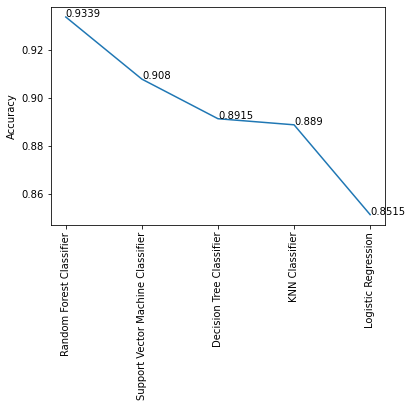

In [127]:
ax = sns.lineplot(x = algo_accuracy.index, y = 'Accuracy', data = algo_accuracy)
plt.xticks( rotation=90)
for i, acc in enumerate (Accuracy):
    plt.annotate(round(acc,4), (algo_accuracy.index[i], Accuracy[i]))

plt.show()

## By the above analysis, We can notice that `Random Forest Classifier` attains the maximum Accuracy of nearly `93.58%`.